In [1]:
import pandas as pd
import numpy as np

#plot
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import plot_confusion_matrix

#other
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc, roc_auc_score

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

!pip install xgboost
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read dataset
preprocessed_df = pd.read_csv('./Data/preprocessed_df.cvs', index_col = 0) 
preprocessed_df.head()

,status_group,amount_tsh,gps_height,longitude,latitude,population,age,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,...,scheme_name_group_machumba estate pipe line,scheme_name_group_makwale water supplied sche,scheme_name_group_mkongoro one,scheme_name_group_mtwango water supply scheme,scheme_name_group_n,scheme_name_group_ngana water supplied scheme,scheme_name_group_other,scheme_name_group_s,scheme_name_group_uroki-bomang'ombe water sup,scheme_name_group_wanging'ombe water
0,1,6000.0,1390,34.938093,-9.856322,109,14,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.0,1399,34.698766,-2.147466,280,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,25.0,686,37.460664,-3.821329,250,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0.0,263,38.486161,-11.155298,58,27,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.0,0,31.130847,-1.825359,150,17,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
preprocessed_df.shape

(59400, 287)

In [4]:
#define X and y
y = preprocessed_df['status_group']
X = preprocessed_df.drop(['status_group'], axis = 1)

In [5]:
#perform test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# Data Transformation

After splitting the data into training and test sets, we use the `MixMaxScaler()` to fit and transform `X_train` and transform `X_test` of continuous variables.

We want to fit and transform only the training data because in a real-world setting, we only have access to this data. We can then use the same scalar object to transform the test data. 

If we to first transform the data and then split into training and test sets, it will lead to data-leakage. 

In [6]:
#scale to make sure that all of our data is represented at the same scale
scale = MinMaxScaler()

#fit
X_train = scale.fit_transform(X_train) #to create a scaled version of the training dataset
X_test = scale.transform(X_test) #to create a scaled version of the test dataset

# Decision Tree

In [7]:
#instantiate baseline model
decision_tree_clf = DecisionTreeClassifier(random_state = 21, criterion = 'entropy')

#fit
decision_tree_clf.fit(X_train, y_train)

#predict
y_hat_train = decision_tree_clf.predict(X_train)
y_hat_test = decision_tree_clf.predict(X_test)

#train accuracy 
decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(decision_tree_test_accuracy))

Train accuracy: 99.76010101010101
Test accuracy: 75.93434343434343


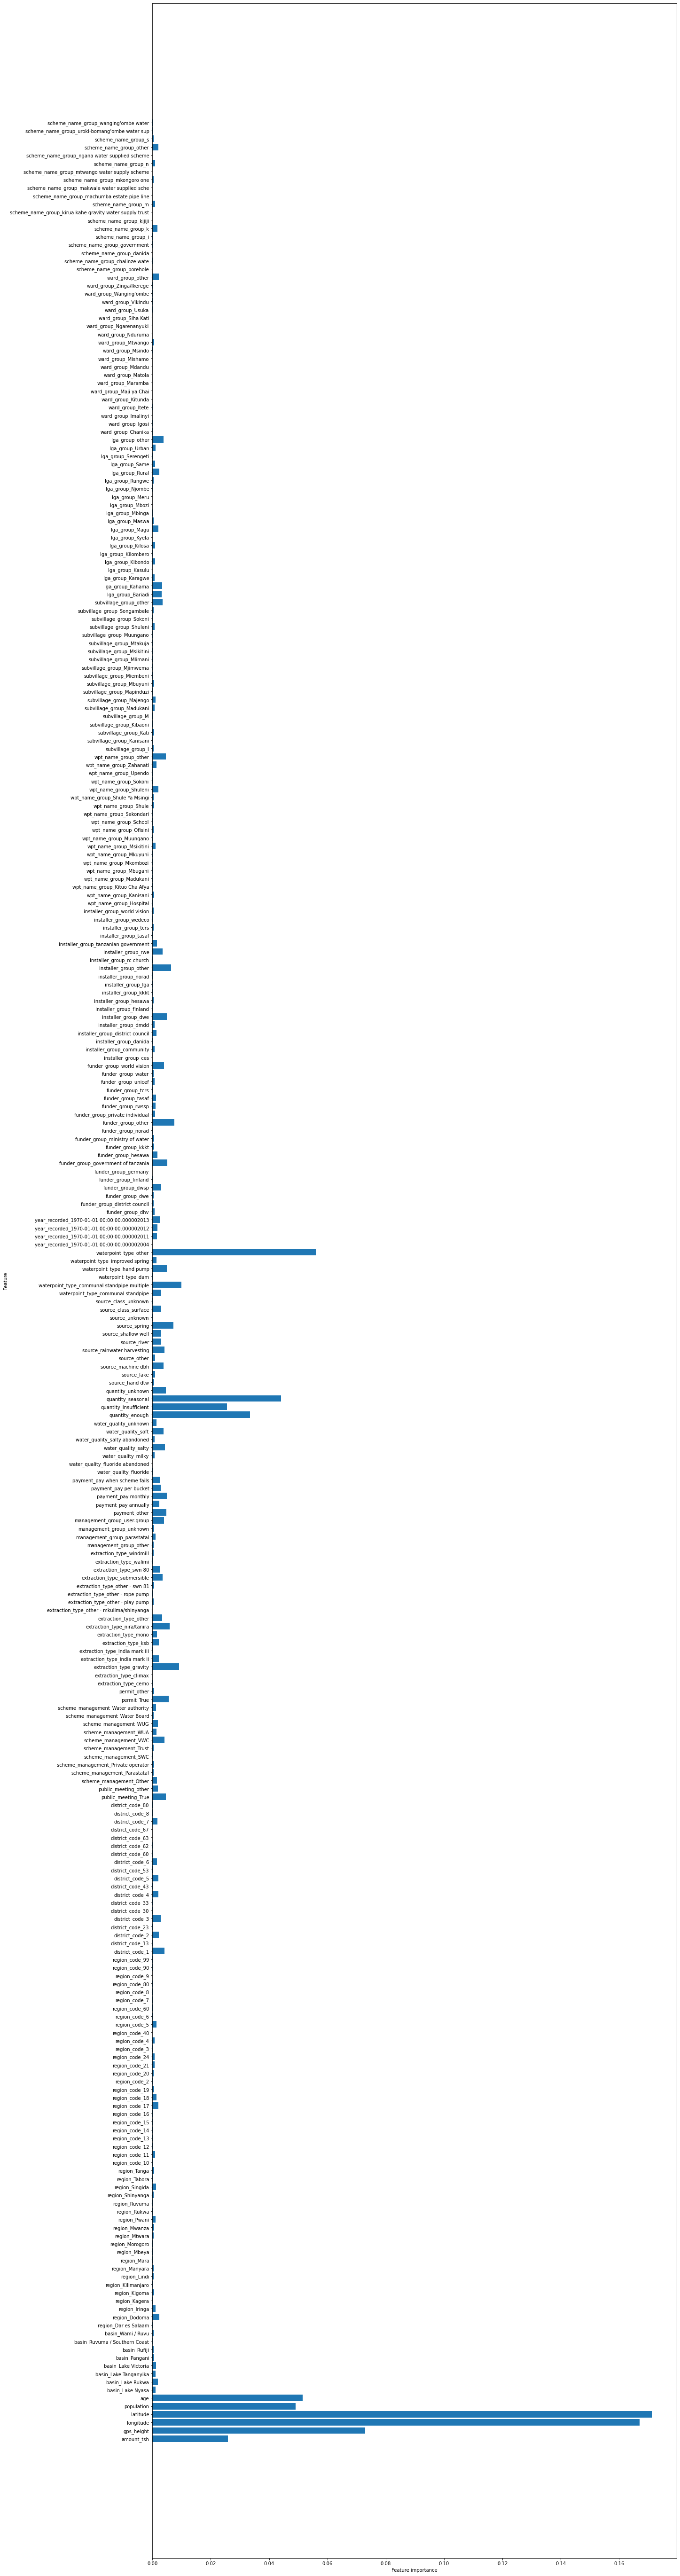

In [8]:
#feature importance
decision_tree_clf.feature_importances_;

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize = (20, 100))
    plt.barh(range(n_features), model.feature_importances_, align = 'center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(decision_tree_clf)

#save
plt.savefig('./Data/decision_tree_clf_feature_importances')

In [9]:
#look for columns with 'ward'
preprocessed_df.filter(like = 'ward').columns

Index(['ward_group_Chanika', 'ward_group_Igosi', 'ward_group_Imalinyi',
       'ward_group_Itete', 'ward_group_Kitunda', 'ward_group_Maji ya Chai',
       'ward_group_Maramba', 'ward_group_Matola', 'ward_group_Mdandu',
       'ward_group_Mishamo', 'ward_group_Msindo', 'ward_group_Mtwango',
       'ward_group_Nduruma', 'ward_group_Ngarenanyuki', 'ward_group_Siha Kati',
       'ward_group_Usuka', 'ward_group_Vikindu', 'ward_group_Wanging'ombe',
       'ward_group_Zinga/Ikerege', 'ward_group_other'],
      dtype='object')

In [10]:
#look for columns with 'subvillage'
preprocessed_df.filter(like = 'subvillage').columns

Index(['subvillage_group_I', 'subvillage_group_Kanisani',
       'subvillage_group_Kati', 'subvillage_group_Kibaoni',
       'subvillage_group_M', 'subvillage_group_Madukani',
       'subvillage_group_Majengo', 'subvillage_group_Mapinduzi',
       'subvillage_group_Mbuyuni', 'subvillage_group_Miembeni',
       'subvillage_group_Mjimwema', 'subvillage_group_Mlimani',
       'subvillage_group_Msikitini', 'subvillage_group_Mtakuja',
       'subvillage_group_Muungano', 'subvillage_group_Shuleni',
       'subvillage_group_Sokoni', 'subvillage_group_Songambele',
       'subvillage_group_other'],
      dtype='object')

In [11]:
#look for columns with 'wpt_name'
preprocessed_df.filter(like = 'wpt_name').columns

Index(['wpt_name_group_Hospital', 'wpt_name_group_Kanisani',
       'wpt_name_group_Kituo Cha Afya', 'wpt_name_group_Madukani',
       'wpt_name_group_Mbugani', 'wpt_name_group_Mkombozi',
       'wpt_name_group_Mkuyuni', 'wpt_name_group_Msikitini',
       'wpt_name_group_Muungano', 'wpt_name_group_Ofisini',
       'wpt_name_group_School', 'wpt_name_group_Sekondari',
       'wpt_name_group_Shule', 'wpt_name_group_Shule Ya Msingi',
       'wpt_name_group_Shuleni', 'wpt_name_group_Sokoni',
       'wpt_name_group_Upendo', 'wpt_name_group_Zahanati',
       'wpt_name_group_other'],
      dtype='object')

In [12]:
#drop features
X.drop(columns = ['ward_group_Chanika', 'ward_group_Igosi', 'ward_group_Imalinyi',
       'ward_group_Itete', 'ward_group_Kitunda', 'ward_group_Maji ya Chai',
       'ward_group_Maramba', 'ward_group_Matola', 'ward_group_Mdandu',
       'ward_group_Mishamo', 'ward_group_Msindo', 'ward_group_Mtwango',
       'ward_group_Nduruma', 'ward_group_Ngarenanyuki', 'ward_group_Siha Kati',
       'ward_group_Usuka', 'ward_group_Vikindu', "ward_group_Wanging'ombe",
       'ward_group_Zinga/Ikerege', 'ward_group_other'], axis = 1, inplace = True)

In [13]:
#drop features
X.drop(columns = ['subvillage_group_I', 'subvillage_group_Kanisani',
       'subvillage_group_Kati', 'subvillage_group_Kibaoni',
       'subvillage_group_M', 'subvillage_group_Madukani',
       'subvillage_group_Majengo', 'subvillage_group_Mapinduzi',
       'subvillage_group_Mbuyuni', 'subvillage_group_Miembeni',
       'subvillage_group_Mjimwema', 'subvillage_group_Mlimani',
       'subvillage_group_Msikitini', 'subvillage_group_Mtakuja',
       'subvillage_group_Muungano', 'subvillage_group_Shuleni',
       'subvillage_group_Sokoni', 'subvillage_group_Songambele',
       'subvillage_group_other'], axis = 1, inplace = True)

In [14]:
#drop features
X.drop(columns = ['wpt_name_group_Hospital', 'wpt_name_group_Kanisani',
       'wpt_name_group_Kituo Cha Afya', 'wpt_name_group_Madukani',
       'wpt_name_group_Mbugani', 'wpt_name_group_Mkombozi',
       'wpt_name_group_Mkuyuni', 'wpt_name_group_Msikitini',
       'wpt_name_group_Muungano', 'wpt_name_group_Ofisini',
       'wpt_name_group_School', 'wpt_name_group_Sekondari',
       'wpt_name_group_Shule', 'wpt_name_group_Shule Ya Msingi',
       'wpt_name_group_Shuleni', 'wpt_name_group_Sokoni',
       'wpt_name_group_Upendo', 'wpt_name_group_Zahanati',
       'wpt_name_group_other'], axis = 1, inplace = True)

In [15]:
#re-perform test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [16]:
#re-scale to make sure that all of our data is represented at the same scale
scale = MinMaxScaler()

#fit
X_train = scale.fit_transform(X_train) #to create a scaled version of the training dataset
X_test = scale.transform(X_test) #to create a scaled version of the test dataset

# Deal with Class Imbalance

In [17]:
#previous original class distribution
print('Class Distribution Before:')
print('Train Set')
print(y_train.value_counts())

#fit
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#check class distribution
print('\n')
print('Class Distribution After:')
print('Train Set')
print(pd.Series(y_train).value_counts())

Class Distribution Before:
Train Set
1    25825
0    18210
2     3485
Name: status_group, dtype: int64


Class Distribution After:
Train Set
2    25825
1    25825
0    25825
Name: status_group, dtype: int64


In [18]:
#instantiate trimmed model
decision_tree_clf = DecisionTreeClassifier(random_state = 21)

#fit
decision_tree_clf.fit(X_train, y_train)

#predict
y_hat_train = decision_tree_clf.predict(X_train)
y_hat_test = decision_tree_clf.predict(X_test)

#train accuracy 
decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(decision_tree_test_accuracy))

#Train accuracy: 99.75605033881897
#Test accuracy: 75.10942760942761

Train accuracy: 99.73927073249436
Test accuracy: 76.01010101010101


* Deleting unnecessary features did not improve the model
* Train and test accuracy are different, meaning the model is still overfit (train welled but did not test well)

In [19]:
#set param grid
#decision_tree_param_grid = {'criterion' : ['gini', 'entropy'],
#                            'min_samples_split' : [8, 10],
#                            'min_samples_leaf' : [3, 4, 5],
#                            'max_depth': [40, 80],
#                            'max_features': ['auto', 'sqrt', 'log2']}

#gridsearch
#decision_tree_gridsearch = GridSearchCV(estimator = decision_tree_clf, 
#                                        param_grid = decision_tree_param_grid,
#                                        scoring = 'accuracy', 
#                                        cv = 5,
#                                        n_jobs = -1)

#fit
#decision_tree_gridsearch.fit(X_train, y_train)

#best param
#decision_tree_gridsearch.best_params_

#'criterion': 'gini',
#'max_depth': 40,
#'max_features': 'auto',
#'min_samples_leaf': 3,
#'min_samples_split': 8

In [20]:
#get cross-validation result
#decision_tree_cross_val_results = pd.DataFrame(decision_tree_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(decision_tree_cross_val_results))

#save
#decision_tree_cross_val_resultss.to_csv('./Data/decision_tree_cross_val_results')

#decision_tree_cross_val_results.head()

In [21]:
#train a classifier with optimal values identified above
#decision_tree_clf = DecisionTreeClassifier(random_state = 21, 
#                                           criterion = 'gini',
#                                           max_depth = 40,
#                                           max_features = 'auto',
#                                           min_samples_leaf = 3,
#                                           min_samples_split = 8)

#fit
#decision_tree_clf.fit(X_train, y_train)

#predict
#y_hat_train = decision_tree_clf.predict(X_train)
#y_hat_test = decision_tree_clf.predict(X_test)

#train accuracy 
#decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
#print('Train accuracy: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
#decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
#print('Test accuracy: {0}'.format(decision_tree_test_accuracy))

#Train accuracy: 82.5892223297838
#Test accuracy: 70.34511784511784

Although accuracy decreases, our model fits better. However, the focus of this competition is accuracy, we will chose to use the baseline model.

In [22]:
#train cross validation
decision_tree_train_cv_score = cross_val_score(decision_tree_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:',decision_tree_train_cv_score)

#test cross validation
decision_tree_test_cv_score = cross_val_score(decision_tree_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:',decision_tree_test_cv_score)

Train cross validation: 0.8177992900935787
Train cross validation: 0.7197811447811447


In [23]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.2684343434343434
Mean Squared Error: 0.3255050505050505
Root Mean Squared Error: 0.5705304991891761


In [24]:
#classification report
decision_tree_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', decision_tree_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      4614
           1       0.81      0.79      0.80      6434
           2       0.35      0.44      0.39       832

    accuracy                           0.76     11880
   macro avg       0.65      0.67      0.66     11880
weighted avg       0.77      0.76      0.76     11880



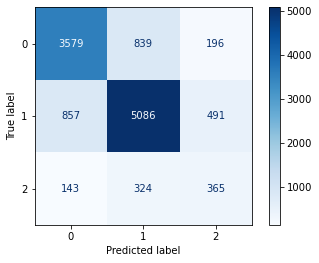

In [25]:
#plot confusion matrix
plot_confusion_matrix(decision_tree_clf, X_test, y_test, cmap = plt.cm.Blues)    

In [26]:
#function bias() to calculate the bias of a model's predictions given the actual data
def bias(y, y_hat):
    return np.mean(y_hat - y)

#function variance() to calculate the variance of a model's predictions
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.021464646464646464
0.38584888588466026


In [27]:
#summary table
summary_table = pd.DataFrame({'Model': [],
                              'Accuracy': [], 'CV': [], 
                              'Precision': [], 'Recall': [], 'F1 Score': [],
                              'MAE': [], 'MSE': [], 'RMSE': [],
                              'AUC': [], 'Bias': [], 'Variance': []
                              })

summary_table.loc[0] = ['Decision Tree',
                        round(decision_tree_test_accuracy, 2), round(decision_tree_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', round(bias(y_test, y_hat_test), 2), round(variance(y_hat_test), 2)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,76.01,0.72,0.65,0.67,0.66,0.27,0.33,0.57,-,0.02,0.39


This Decision Tree is not a very good model: 
* low accuracy, precision, and recall
* high errors 
* overfit

# Logistic Regression

In [28]:
#instantiate baseline model
logreg_clf = LogisticRegression(random_state = 21)

#fit
logreg_clf.fit(X_train, y_train)

#predict
y_hat_train = logreg_clf.predict(X_train)
y_hat_test = logreg_clf.predict(X_test)

#train accuracy 
logreg_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(logreg_train_accuracy))

#test accuracy 
logreg_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(logreg_test_accuracy))

#Train accuracy: 67.75217812197482
#Test accuracy: 65.79966329966331

Train accuracy: 67.72249112616974
Test accuracy: 65.3114478114478


In [29]:
#set param grid
#logreg_param_grid = {'solver' : ['sag', 'saga', 'liblinear'],
#                     'multi_class': ['multinomial', 'auto']}

#gridsearch
#logreg_gridsearch = GridSearchCV(estimator = logreg_clf,
#                                 param_grid = logreg_param_grid,
#                                 scoring = 'accuracy', cv = 5,
#                                 n_jobs = -1)

#fit
#logreg_gridsearch.fit(X_train, y_train)

#best param
#logreg_gridsearch.best_params_

#'multi_class': 'multinomial' 
#'solver': 'saga'

In [30]:
#get cross-validation result
#logreg_cross_val_results = pd.DataFrame(logreg_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(logreg_cross_val_results))

#save
#logreg_cross_val_results.to_csv('./Data/logreg_cross_val_results')

#logreg_cross_val_results.head()

In [31]:
#train a classifier with optimal values identified above
#logreg_clf = LogisticRegression(random_state = 21,
#                                multi_class = 'multinomial', 
#                                solver = 'saga')

#fit
#logreg_clf.fit(X_train, y_train)

#predict
#y_hat_train = logreg_clf.predict(X_train)
#y_hat_test = logreg_clf.predict(X_test)

#train accuracy 
#logreg_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
#print('Train accuracy: {0}'.format(logreg_train_accuracy))

#test accuracy 
#logreg_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
#print('Test accuracy: {0}'.format(logreg_test_accuracy))

#Train accuracy: 67.83220393675379
#Test accuracy: 65.41245791245791

Optimized model did not do better than baseline model.

In [32]:
#train cross validation
logreg_train_cv_score = cross_val_score(logreg_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', logreg_train_cv_score)

#test cross validation
logreg_test_cv_score = cross_val_score(logreg_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', logreg_test_cv_score)

Train cross validation: 0.6749661181026138
Test cross validation: 0.7422558922558923


In [33]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.41624579124579125
Mean Squared Error: 0.55496632996633
Root Mean Squared Error: 0.7449606230978454


In [34]:
#classification report
logreg_classification_report = classification_report(y_test, y_hat_test)
print('Model: Logistic Regression', '\n', logreg_classification_report)

Model: Logistic Regression 
               precision    recall  f1-score   support

           0       0.79      0.65      0.71      4614
           1       0.80      0.65      0.72      6434
           2       0.21      0.70      0.32       832

    accuracy                           0.65     11880
   macro avg       0.60      0.67      0.58     11880
weighted avg       0.75      0.65      0.69     11880



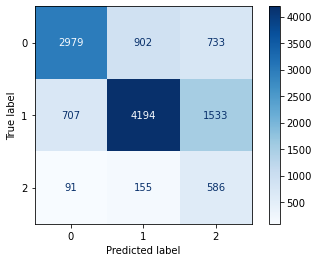

In [35]:
#plot confusion matrix
plot_confusion_matrix(logreg_clf, X_test, y_test, cmap = plt.cm.Blues)

AUC: 0.816943460006684


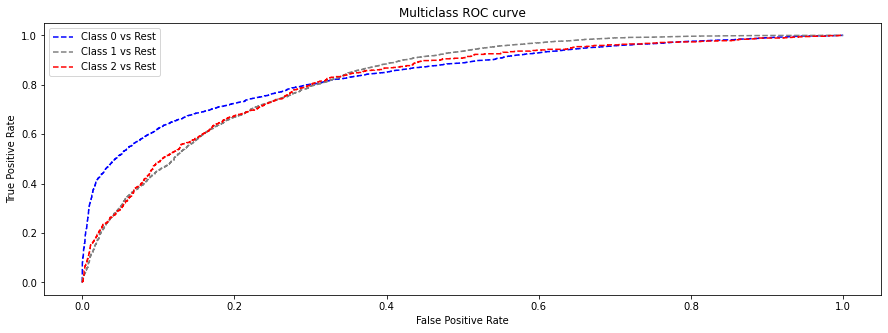

In [36]:
#get AUC
logreg_y_score = logreg_clf.fit(X_train, y_train).decision_function(X_test)

#roc curve for classes
logreg_fpr = {}
logreg_tpr = {}
logreg_thresh = {}

n_class = 3

for i in range(n_class):    
    logreg_fpr[i], logreg_tpr[i], logreg_thresh[i] = roc_curve(y_test, logreg_y_score[:, i], pos_label = i)

# plotting
plt.figure(figsize = (15, 5))
plt.plot(logreg_fpr[0], logreg_tpr[0], linestyle = '--',color = 'blue', label = 'Class 0 vs Rest')
plt.plot(logreg_fpr[1], logreg_tpr[1], linestyle = '--',color = 'gray', label = 'Class 1 vs Rest')
plt.plot(logreg_fpr[2], logreg_tpr[2], linestyle = '--',color = 'red', label = 'Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')

plt.savefig('./Data/logreg_roc')

#get AUC
print('AUC:', auc(logreg_fpr[i], logreg_tpr[i]))

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

This model performs better at correctly classifying Class 0 than Class 1 & Class 2.

In [37]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.2404882154882155
0.5519341492931561


In [38]:
#summary table
summary_table.loc[1] = ['Logistic Regression',
                        round(logreg_test_accuracy, 2), round(logreg_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        round(auc(logreg_fpr[i], logreg_tpr[i]), 2), round(bias(y_test, y_hat_test), 2), round(variance(y_hat_test), 2)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,76.01,0.72,0.65,0.67,0.66,0.27,0.33,0.57,-,0.02,0.39
1,Logistic Regression,65.31,0.74,0.60,0.67,0.58,0.42,0.55,0.74,0.82,0.24,0.55


This Logistic Regression is not a very good model: 
* low accuracy, precision, and recall
* high errors 
* overfit although fits better than Decision Tree

# K-Nearest Neighbor

In [39]:
#instantiate baseline model
knn_clf = KNeighborsClassifier()

#fit
knn_clf.fit(X_train, y_train)

#predict on the test set
y_hat_train = knn_clf.predict(X_train)
y_hat_test = knn_clf.predict(X_test)

#train accuracy 
knn_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(knn_train_accuracy))

#test accuracy 
knn_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(knn_test_accuracy))

#Train accuracy: 87.64375605033882
#Test accuracy: 73.33333333333333

Train accuracy: 87.57921910293643
Test accuracy: 73.9983164983165


In [40]:
#set param grid
#knn_param_grid = {"n_neighbors" : [3, 5, 7, 10],
#                  'weights' : ['uniform', 'distance']}

#gridsearch
#knn_gridsearch = GridSearchCV(estimator = knn_clf,
#                             param_grid = knn_param_grid,
#                             scoring = 'accuracy', cv = 5,
#                             n_jobs = -1)

#fit
#knn_gridsearch.fit(X_train, y_train)

#best param
#knn_gridsearch.best_params_

#'n_neighbors': 3
#'weights': 'distance'

In [41]:
#get cross-validation result
#knn_cross_val_results = pd.DataFrame(knn_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(knn_cross_val_results))

#save
#knn_cross_val_results.to_csv('./Data/knn_cross_val_results')

#knn_cross_val_results.head()

In [42]:
#train a classifier with optimal values identified above
knn_clf = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

#fit
knn_clf.fit(X_train, y_train)

#predict on the test set
y_hat_train = knn_clf.predict(X_train)
y_hat_test = knn_clf.predict(X_test)

#train accuracy 
knn_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(knn_train_accuracy))

#test accuracy 
knn_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(knn_test_accuracy))

#Train accuracy: 99.66698935140369
#Test accuracy: 75.22727272727273

Train accuracy: 99.62955792191029
Test accuracy: 75.66498316498317


The optimized model accuracy increased just a little but the fit got much worse. Again, accuracy is more important in this competition, we'll go with the optimized KNN model.

In [43]:
#train cross validation
knn_train_cv_score = cross_val_score(knn_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', knn_train_cv_score)

#test cross validation
knn_test_cv_score = cross_val_score(knn_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', knn_test_cv_score)

Train cross validation: 0.8342949338496289
Test cross validation: 0.7242424242424242


In [44]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.2767676767676768
Mean Squared Error: 0.3436026936026936
Root Mean Squared Error: 0.5861763331990585


In [45]:
#classification report
knn_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', knn_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      4614
           1       0.82      0.79      0.80      6434
           2       0.33      0.48      0.39       832

    accuracy                           0.76     11880
   macro avg       0.64      0.68      0.66     11880
weighted avg       0.77      0.76      0.76     11880



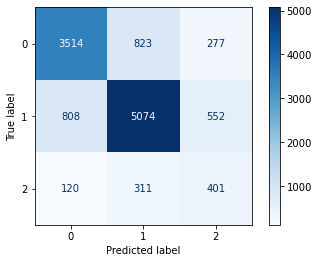

In [46]:
#plot
plot_confusion_matrix(knn_clf, X_test, y_test, cmap = plt.cm.Blues)    

In [47]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.047979797979797977
0.4043409402668662


In [48]:
#summary table
summary_table.loc[2] = ['KNN',
                        round(knn_test_accuracy, 2), round(knn_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', round(bias(y_test, y_hat_test), 2), round(variance(y_hat_test), 2)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,76.01,0.72,0.65,0.67,0.66,0.27,0.33,0.57,-,0.02,0.39
1,Logistic Regression,65.31,0.74,0.60,0.67,0.58,0.42,0.55,0.74,0.82,0.24,0.55
2,KNN,75.66,0.72,0.64,0.68,0.66,0.28,0.34,0.59,-,0.05,0.40


This KNN is not a very good model: 
* low accuracy, precision, and recall
* high errors 
* overfit

# Bagged Tree

In [49]:
#instantiate baseline model
bagged_tree_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 21),
                                    random_state = 21)

#fit
bagged_tree_clf.fit(X_train, y_train)

#predict
y_hat_test = bagged_tree_clf.predict(X_test)
y_hat_train = bagged_tree_clf.predict(X_train)

#train accuracy
bagged_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(bagged_tree_train_accuracy))

#test accuracy
bagged_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(bagged_tree_test_accuracy))

#Train accuracy: 98.86414972571798
#Test accuracy: 77.72727272727272

Train accuracy: 98.81768312358825
Test accuracy: 78.2070707070707


In [50]:
#set param grid
#bagged_tree_param_grid = {'n_estimators' : [20, 50, 100],
##                          'max_samples': [1, 5, 10, 20, 50],
 #                         'max_features': [1, 5, 10, 20, 50]}

#gridsearch
#bagged_tree_gridsearch = GridSearchCV(estimator = bagged_tree_clf, 
#                                        param_grid = bagged_tree_param_grid,
#                                        scoring = 'accuracy', cv = 5,
#                                        n_jobs = -1)

#fit
#bagged_tree_gridsearch.fit(X_train, y_train)

#best param
#bagged_tree_gridsearch.best_params_

#'bootstrap': False,
#'bootstrap_features': True,
#'max_features': 50,
#'max_samples': 50,
#'n_estimators': 100

In [51]:
#get cross-validation result
#bagged_tree_cross_val_results = pd.DataFrame(bagged_tree_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(bagged_tree_cross_val_results))

#save
#bagged_tree_cross_val_results.to_csv('./Data/bagged_tree_cross_val_results')

#bagged_tree_cross_val_results.head()

In [52]:
#train a classifier with optimal values identified above
#bagged_tree_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 21,
#                                                           criterion = 'gini',
#                                                           max_depth = 40,
#                                                           max_features = 'auto',
#                                                           min_samples_leaf = 3,
#                                                           min_samples_split = 8),
#                                    random_state = 21,
#                                    max_features = 50,
#                                    max_samples = 50,
#                                    n_estimators = 100)

#fit
#bagged_tree_clf.fit(X_train, y_train)

#predict
#y_hat_test = bagged_tree_clf.predict(X_test)
#y_hat_train = bagged_tree_clf.predict(X_train)

#train accuracy
#bagged_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
#print('Train accuracy: {0}'.format(bagged_tree_train_accuracy))

#test accuracy
#bagged_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
#print('Test accuracy: {0}'.format(bagged_tree_test_accuracy))

#Train accuracy: 55.81800580832527
#Test accuracy: 52.07912457912458

The both optimized model's accuracy the fit got worse. We'll go with the baseline Bagged_Tree model.

In [53]:
#train cross validation
bagged_tree_train_cv_score = cross_val_score(bagged_tree_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', bagged_tree_train_cv_score)

#test cross validation
bagged_tree_test_cv_score = cross_val_score(bagged_tree_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', bagged_tree_test_cv_score)

Test cross validation: 0.8470990642142626
Train cross validation: 0.759090909090909


In [54]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.24377104377104378
Mean Squared Error: 0.29545454545454547
Root Mean Squared Error: 0.543557306504609


In [55]:
#classification report
bagged_tree_classification_report = classification_report(y_test, y_hat_test)
print('Model: Bagged Tree', '\n', bagged_tree_classification_report)

Model: Bagged Tree 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      4614
           1       0.83      0.82      0.82      6434
           2       0.40      0.45      0.42       832

    accuracy                           0.78     11880
   macro avg       0.67      0.69      0.68     11880
weighted avg       0.79      0.78      0.78     11880



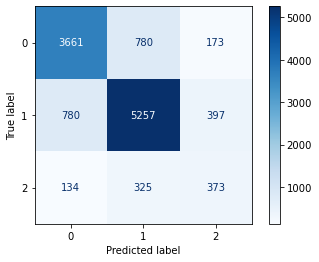

In [56]:
#plot confusion matrix
plot_confusion_matrix(bagged_tree_clf, X_test, y_test, cmap = plt.cm.Blues)

In [57]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.012626262626262626
0.3710110079470349


In [58]:
#summary table
summary_table.loc[3] = ['Bagged Tree',
                        round(bagged_tree_test_accuracy, 2), round(bagged_tree_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', round(bias(y_test, y_hat_test), 2), round(variance(y_hat_test), 2)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,76.01,0.72,0.65,0.67,0.66,0.27,0.33,0.57,-,0.02,0.39
1,Logistic Regression,65.31,0.74,0.60,0.67,0.58,0.42,0.55,0.74,0.82,0.24,0.55
2,KNN,75.66,0.72,0.64,0.68,0.66,0.28,0.34,0.59,-,0.05,0.40
3,Bagged Tree,78.21,0.76,0.67,0.69,0.68,0.24,0.30,0.54,-,0.01,0.37


This Bagged Tree is OK model: 
* better accuracy, precision, and recall than the first 3
* lower error score
* however, still overfit

# Random Forest

In [59]:
#instantiate baseline model
random_forest_clf = RandomForestClassifier(random_state = 21)

#fit
random_forest_clf.fit(X_train, y_train)

#predict
y_hat_train = random_forest_clf.predict(X_train)
y_hat_test = random_forest_clf.predict(X_test)

#train accuracy
random_forest_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(random_forest_train_accuracy))

#test accuracy
random_forest_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(random_forest_test_accuracy))

#Train accuracy: 99.75475959987092
#Test accuracy: 79.15824915824916

Train accuracy: 99.7379799935463
Test accuracy: 79.36868686868686


In [60]:
#set param grid
#random_forest_param_grid = {'n_estimators' : [20, 50, 100],
#                            'criterion' : ['gini', 'entropy'],
#                            'min_samples_split' : [8, 10, 12],
#                            'min_samples_leaf' : [3, 4, 5],
#                            'max_depth': [40, 80],
#                            'max_features': ['auto', 'sqrt', 'log2']}

#gridsearch
#random_forest_gridsearch = GridSearchCV(estimator = random_forest_clf, 
#                                        param_grid = random_forest_param_grid,
#                                        scoring = 'accuracy', cv = 5,
#                                        n_jobs = -1)

#fit
#random_forest_gridsearch.fit(X_train, y_train)

#best param
#random_forest_gridsearch.best_params_

#'criterion': 'gini',
#'max_depth': 40,
#'max_features': 'auto',
#'min_samples_leaf': 3,
#'min_samples_split': 8,
#'n_estimators': 100

In [61]:
#get cross-validation result
#random_forest_cross_val_results = pd.DataFrame(random_forest_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(random_forest_cross_val_results))

#save
#random_forest_cross_val_results.to_csv('./Data/random_forest_cross_val_results')

#random_forest_cross_val_results.head()

In [62]:
#train a classifier with optimal values identified above
#random_forest_clf = RandomForestClassifier(random_state = 21, 
#                                           criterion = 'gini',
#                                           max_depth = 40,
#                                           max_features = 'auto',
#                                           min_samples_leaf = 3,
#                                           min_samples_split = 8,
#                                           n_estimators = 100)

#fit
#random_forest_clf.fit(X_train, y_train)

#predict
#y_hat_train = random_forest_clf.predict(X_train)
#y_hat_test = random_forest_clf.predict(X_test)

#train accuracy
#random_forest_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
#print('Train accuracy: {0}'.format(random_forest_train_accuracy))

#test accuracy
#random_forest_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
#print('Test accuracy: {0}'.format(random_forest_test_accuracy))

#Train accuracy: 89.52565343659245
#Test accuracy: 77.54208754208754

The optimized model's accuracy decreased but the fit improved. Still, we'll go with the baseline Random Forest model.

In [63]:
#train cross validation
random_forest_train_cv_score = cross_val_score(random_forest_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', random_forest_train_cv_score)

#test cross validation
random_forest_test_cv_score = cross_val_score(random_forest_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', random_forest_test_cv_score)

Train cross validation: 0.867376573088093
Test cross validation: 0.7675084175084176


In [64]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.23072390572390572
Mean Squared Error: 0.27954545454545454
Root Mean Squared Error: 0.5287205826761944


In [65]:
#classification report
random_forest_classification_report = classification_report(y_test, y_hat_test)
print('Model: Random Forest', '\n', random_forest_classification_report)

Model: Random Forest 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      4614
           1       0.83      0.84      0.83      6434
           2       0.41      0.46      0.43       832

    accuracy                           0.79     11880
   macro avg       0.69      0.70      0.69     11880
weighted avg       0.80      0.79      0.80     11880



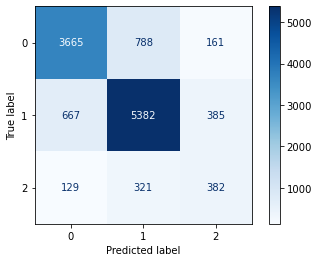

In [66]:
#plot confusion matrix
plot_confusion_matrix(random_forest_clf, X_test, y_test, cmap = plt.cm.Blues)

In [67]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.02095959595959596
0.3651783760727364


In [68]:
#summary table
summary_table.loc[4] = ['Random Forest',
                        round(random_forest_test_accuracy, 2), round(random_forest_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', round(bias(y_test, y_hat_test), 2), round(variance(y_hat_test), 2)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,76.01,0.72,0.65,0.67,0.66,0.27,0.33,0.57,-,0.02,0.39
1,Logistic Regression,65.31,0.74,0.60,0.67,0.58,0.42,0.55,0.74,0.82,0.24,0.55
2,KNN,75.66,0.72,0.64,0.68,0.66,0.28,0.34,0.59,-,0.05,0.40
3,Bagged Tree,78.21,0.76,0.67,0.69,0.68,0.24,0.30,0.54,-,0.01,0.37
4,Random Forest,79.37,0.77,0.69,0.70,0.69,0.23,0.28,0.53,-,0.02,0.37


This Random Forest is an OK model: 
* improved accuracy, precision, and recall
* lower errors 
* still overfit

# Gradient Boosting

In [69]:
#instantiate baseline model
gradient_boost_clf = GradientBoostingClassifier(random_state = 21)

#fit
gradient_boost_clf.fit(X_train, y_train)

#predict
y_hat_train = gradient_boost_clf.predict(X_train)
y_hat_test = gradient_boost_clf.predict(X_test)

#train accuracy
gradient_boost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(gradient_boost_train_accuracy))

#test accuracy
gradient_boost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy))

#Train accuracy: 73.94127137786383
#Test accuracy: 69.7979797979798

Train accuracy: 73.83026782833171
Test accuracy: 69.25925925925925


In [70]:
#set param grid
#gradient_boost_param_grid = {'learning_rate': [0.025, 0.05],
#                             'subsample': [0.5, 1.0]}

#gridsearch
#gradient_boost_gridsearch = GridSearchCV(estimator = gradient_boost_clf,
#                                         param_grid = gradient_boost_param_grid, 
#                                         scoring = 'accuracy',
#                                         n_jobs = -1,
#                                         cv = 5)

#fit
#gradient_boost_gridsearch.fit(X_train, y_train)

#best param
#gradient_boost_gridsearch.best_params_

#'learning_rate': 0.05, 
#'subsample': 0.5

In [71]:
#get cross-validation result
#gradient_boost_cross_val_results = pd.DataFrame(gradient_boost_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(gradient_boost_cross_val_results))

#save
#gradient_boost_cross_val_results.to_csv('./Data/gradient_boost_cross_val_results')

#gradient_boost_cross_val_results.head()

In [72]:
#train a classifier with optimal values identified above
gradient_boost_clf = GradientBoostingClassifier(random_state = 21,
                                                max_depth = 40,
                                                max_features = 'auto',
                                                min_samples_leaf = 3,
                                                min_samples_split = 8,
                                                n_estimators = 100,
                                                learning_rate = 0.05,
                                                subsample = 0.5)

#fit
gradient_boost_clf.fit(X_train, y_train)

#predict
y_hat_train = gradient_boost_clf.predict(X_train)
y_hat_test = gradient_boost_clf.predict(X_test)

#train accuracy
gradient_boost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(gradient_boost_train_accuracy))

#test accuracy
gradient_boost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy))

#Train accuracy: 99.62568570506615
#Test accuracy: 79.4949494949495

Train accuracy: 99.60116166505324
Test accuracy: 79.85690235690235


Optimized model has improved accuracy score, we'll select it.

In [73]:
#train cross validation
gradient_boost_train_cv_score = cross_val_score(gradient_boost_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', gradient_boost_train_cv_score)

#test cross validation
gradient_boost_test_cv_score = cross_val_score(gradient_boost_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', gradient_boost_test_cv_score)

Train cross validation: 0.869970958373669
Train cross validation: 0.7766835016835018


In [74]:
#evaluate
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.2249158249158249
Mean Squared Error: 0.2718855218855219
Root Mean Squared Error: 0.5214264299836765


In [75]:
#classification report
gradient_boost_classification_report = classification_report(y_test, y_hat_test)
print('Model: Gradient Boosting', '\n', gradient_boost_classification_report)

Model: Gradient Boosting 
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      4614
           1       0.83      0.85      0.84      6434
           2       0.41      0.47      0.44       832

    accuracy                           0.80     11880
   macro avg       0.69      0.70      0.70     11880
weighted avg       0.80      0.80      0.80     11880



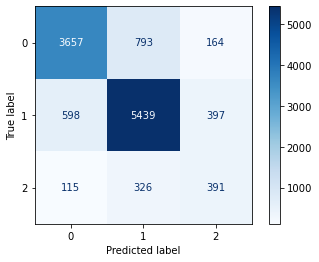

In [76]:
#plot confusion matrix
plot_confusion_matrix(gradient_boost_clf, X_test, y_test, cmap = plt.cm.Blues)

In [77]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.03063973063973064
0.36520250201226623


In [78]:
#summary table
summary_table.loc[5] = ['Gradient Boost',
                        round(gradient_boost_test_accuracy, 2), round(gradient_boost_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', round(bias(y_test, y_hat_test), 2), round(variance(y_hat_test), 2)]
summary_table.head(10)

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,76.01,0.72,0.65,0.67,0.66,0.27,0.33,0.57,-,0.02,0.39
1,Logistic Regression,65.31,0.74,0.60,0.67,0.58,0.42,0.55,0.74,0.82,0.24,0.55
2,KNN,75.66,0.72,0.64,0.68,0.66,0.28,0.34,0.59,-,0.05,0.40
3,Bagged Tree,78.21,0.76,0.67,0.69,0.68,0.24,0.30,0.54,-,0.01,0.37
4,Random Forest,79.37,0.77,0.69,0.70,0.69,0.23,0.28,0.53,-,0.02,0.37
5,Gradient Boost,79.86,0.78,0.69,0.70,0.70,0.22,0.27,0.52,-,0.03,0.37


This Gradient Boost is an OK model:

* improved accuracy, precision, and recall
* lower errors
* still overfit

# AdaBoost

In [79]:
#instantiate baseline model
adaboost_clf = AdaBoostClassifier(random_state = 21)

#fit
adaboost_clf.fit(X_train, y_train)

#predict
y_hat_train = adaboost_clf.predict(X_train)
y_hat_test = adaboost_clf.predict(X_test)

#train accuracy
adaboost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0} '.format(adaboost_train_accuracy))

#test accuracy
adaboost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0} '.format(adaboost_test_accuracy))

#Train accuracy: 65.12939657954179 
#Test accuracy: 63.86363636363637

Train accuracy: 64.53436592449178 
Test accuracy: 63.005050505050505 


In [80]:
#param
#adaboost_param_grid = {'learning_rate': [0.01, 0.05],
#                       'n_estimators' : [50, 100]}

#gridsearch
#adaboost_gridsearch = GridSearchCV(estimator = adaboost_clf,
#                                   param_grid = adaboost_param_grid,
#                                   scoring = 'accuracy',
#                                   n_jobs = -1,
#                                   cv = 5)

#fit
#adaboost_gridsearch.fit(X_train, y_train)

#best param
#adaboost_gridsearch.best_params_

#'learning_rate': 0.05, 
#'n_estimators': 100

In [81]:
#get cross-validation result
#adaboost_cross_val_results = pd.DataFrame(adaboost_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(adaboost_cross_val_results))

#save
#adaboost_cross_val_results.to_csv('./Data/adaboost_cross_val_results')

#adaboost_cross_val_results.head()

In [82]:
#train a classifier with optimal values identified above
#adaboost_clf = AdaBoostClassifier(random_state = 21,
#                                  learning_rate = 0.05,
#                                  n_estimators = 100)

#fit
#adaboost_clf.fit(X_train, y_train)

#predict
#y_hat_train = adaboost_clf.predict(X_train)
#y_hat_test = adaboost_clf.predict(X_test)

#train accuracy
#adaboost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
#print('Train accuracy:', adaboost_train_accuracy)

#test accuracy
#adaboost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
#print('Test accuracy:', adaboost_test_accuracy)

#Train accuracy: 54.92223297838012
#Test accuracy: 57.398989898989896

Baseline model is doing much better than the optimized one, we'll select for it.

In [83]:
#train cross validation
adaboost_train_cv_score = cross_val_score(adaboost_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', adaboost_train_cv_score)

#test cross validation
adaboost_test_cv_score = cross_val_score(adaboost_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', adaboost_test_cv_score)

Train cross validation: 0.64081316553727
Test cross validation: 0.718013468013468


In [84]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.4446969696969697
Mean Squared Error: 0.5941919191919192
Root Mean Squared Error: 0.7708384520714565


In [85]:
#classification report
adaboost_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', adaboost_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.73      0.61      0.66      4614
           1       0.77      0.65      0.71      6434
           2       0.19      0.57      0.28       832

    accuracy                           0.63     11880
   macro avg       0.56      0.61      0.55     11880
weighted avg       0.71      0.63      0.66     11880



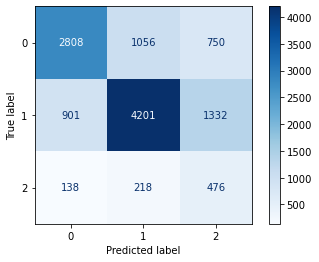

In [86]:
#plot confusion matrix
plot_confusion_matrix(adaboost_clf, X_test, y_test, cmap = plt.cm.Blues)

In [87]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.20984848484848484
0.5273687988187147


In [88]:
#summary table
summary_table.loc[6] = ['ADABoost',
                        round(adaboost_test_accuracy, 2), round(adaboost_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', round(bias(y_test, y_hat_test), 2), round(variance(y_hat_test), 2)]
summary_table.head(10)

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,76.01,0.72,0.65,0.67,0.66,0.27,0.33,0.57,-,0.02,0.39
1,Logistic Regression,65.31,0.74,0.60,0.67,0.58,0.42,0.55,0.74,0.82,0.24,0.55
2,KNN,75.66,0.72,0.64,0.68,0.66,0.28,0.34,0.59,-,0.05,0.40
3,Bagged Tree,78.21,0.76,0.67,0.69,0.68,0.24,0.30,0.54,-,0.01,0.37
4,Random Forest,79.37,0.77,0.69,0.70,0.69,0.23,0.28,0.53,-,0.02,0.37
5,Gradient Boost,79.86,0.78,0.69,0.70,0.70,0.22,0.27,0.52,-,0.03,0.37
6,ADABoost,63.01,0.72,0.56,0.61,0.55,0.44,0.59,0.77,-,0.21,0.53


This ADABoost is not a good model:

* low accuracy, precision, and recall
* high errors
* overfit but better than those of higher accuracy

# XGBoost

In [89]:
#instantiate baseline model
xgb_clf = xgb.XGBClassifier(random_state = 21)

#train a classifier with optimal values identified above
xgb_clf = xgb.XGBClassifier(random_state = 21)

#fit
xgb_clf.fit(X_train, y_train)

#predict
y_hat_train = xgb_clf.predict(X_train)
y_hat_test = xgb_clf.predict(X_test)

#train accuracy
xgb_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', xgb_train_accuracy)

#test accuracy
xgb_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', xgb_test_accuracy)

#Train accuracy: 85.96708615682478
#Test accuracy: 77.28114478114479

Train accuracy: 85.97612132946112
Test accuracy: 77.02861952861953


In [90]:
#set param grid
#xgb_param_grid = {'booster' : ['gbtree', 'gblinear'],
#                  'min_child_weight' : [1, 3]}

#gridsearch
#xgb_gridsearch = GridSearchCV(estimator = xgb_clf, 
#                                        param_grid = xgb_param_grid,
#                                        scoring = 'accuracy', cv = 5,
#                                        n_jobs = -1)

#fit
#xgb_gridsearch.fit(X_train, y_train)

#best param
#xgb_gridsearch.best_params_

#'booster': 'gbtree', 
#'min_child_weight': 1

In [91]:
#get cross-validation result
#xgb_cross_val_results = pd.DataFrame(xgb_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(xgb_cross_val_results))

#save
#xgb_cross_val_results.to_csv('./Data/xgb_cross_val_results')

#xgb_cross_val_results.head()

In [92]:
#train a classifier with optimal values identified above
xgb_clf = xgb.XGBClassifier(random_state = 21,
                            booster = 'gbtree',
                            min_child_weight = 1)

#fit
xgb_clf.fit(X_train, y_train)

#predict
y_hat_train = xgb_clf.predict(X_train)
y_hat_test = xgb_clf.predict(X_test)

#train accuracy
xgb_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', xgb_train_accuracy)

#test accuracy
xgb_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', xgb_test_accuracy)

#Train accuracy: 85.85995482413682
#Test accuracy: 77.3063973063973

Train accuracy: 85.97612132946112
Test accuracy: 77.02861952861953


We'll select for the optimized model's higher accuracy.

In [93]:
#train cross validation
xgb_train_cv_score = cross_val_score(xgb_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', xgb_train_cv_score)

#test cross validation
xgb_test_cv_score = cross_val_score(xgb_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', xgb_test_cv_score)

Train cross validation: 0.8240722813810907
Test cross validation: 0.7761784511784512


In [94]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.2595959595959596
Mean Squared Error: 0.31936026936026934
Root Mean Squared Error: 0.5651196947198615


In [95]:
#classification report
xgb_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', xgb_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.84      0.75      0.79      4614
           1       0.82      0.81      0.81      6434
           2       0.34      0.56      0.42       832

    accuracy                           0.77     11880
   macro avg       0.67      0.71      0.68     11880
weighted avg       0.79      0.77      0.78     11880



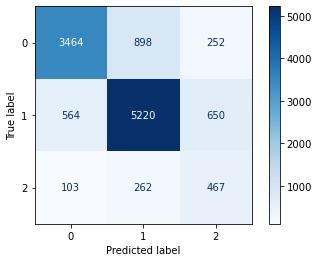

In [96]:
#plot confusion matrix
plot_confusion_matrix(xgb_clf, X_test, y_test, cmap = plt.cm.Blues)

In [97]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.08585858585858586
0.40891062703352266


In [98]:
#summary table
summary_table.loc[7] = ['XGBoost',
                        round(xgb_test_accuracy, 2), round(xgb_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', round(bias(y_test, y_hat_test), 2), round(variance(y_hat_test), 2)]
summary_table.head(10)

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,76.01,0.72,0.65,0.67,0.66,0.27,0.33,0.57,-,0.02,0.39
1,Logistic Regression,65.31,0.74,0.60,0.67,0.58,0.42,0.55,0.74,0.82,0.24,0.55
2,KNN,75.66,0.72,0.64,0.68,0.66,0.28,0.34,0.59,-,0.05,0.40
3,Bagged Tree,78.21,0.76,0.67,0.69,0.68,0.24,0.30,0.54,-,0.01,0.37
4,Random Forest,79.37,0.77,0.69,0.70,0.69,0.23,0.28,0.53,-,0.02,0.37
5,Gradient Boost,79.86,0.78,0.69,0.70,0.70,0.22,0.27,0.52,-,0.03,0.37
6,ADABoost,63.01,0.72,0.56,0.61,0.55,0.44,0.59,0.77,-,0.21,0.53
7,XGBoost,77.03,0.78,0.67,0.71,0.68,0.26,0.32,0.57,-,0.09,0.41


This XGBoost is not a good model:

* low accuracy, precision, and recall
* high errors
* overfit

# Support Vector Machine

In [99]:
#instantiate baseline model
svm_clf = SVC(random_state = 21)

#fit
svm_clf.fit(X_train, y_train)

#predict
y_hat_train = svm_clf.predict(X_train)
y_hat_test = svm_clf.predict(X_test)

#train accuracy
svm_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', svm_train_accuracy)

#test accuracy
svm_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', svm_test_accuracy)

#Train accuracy: 80.3162310422717
#Test accuracy: 73.0050505050505

Train accuracy: 80.00516295579219
Test accuracy: 72.5


In [100]:
#set param grid
#svm_param_grid = {'decision_function_shape': ['ovo', 'ovr']}

#gridsearch
#svm_gridsearch = GridSearchCV(estimator = svm_clf,
#                              param_grid = svm_param_grid,
#                              scoring = 'accuracy', cv = 5,
#                              n_jobs = -1)

#fit
#svm_gridsearch.fit(X_train, y_train)

#best param
#svm_gridsearch.best_params_

#'decision_function_shape': 'ovo'

In [101]:
#train a classifier with optimal values identified above
#svm_clf = SVC(random_state = 21, decision_function_shape = 'ovo')

#fit
#svm_clf.fit(X_train, y_train)

#predict
#y_hat_train = svm_clf.predict(X_train)
#y_hat_test = svm_clf.predict(X_test)

#train accuracy
#svm_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
#print('Train accuracy:', svm_train_accuracy)

#test accuracy
#svm_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
#print('Test accuracy:', svm_test_accuracy)

#Train accuracy: 80.3162310422717
#Test accuracy: 73.0050505050505

Both baseline model and optimized model perform the same.

In [102]:
#train cross validation
svm_train_cv_score = cross_val_score(svm_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', svm_train_cv_score)

#test cross validation
svm_test_cv_score = cross_val_score(svm_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', svm_test_cv_score)

Train cross validation: 0.7791416585995481
Test cross validation: 0.7632996632996634


In [103]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.325
Mean Squared Error: 0.425
Root Mean Squared Error: 0.6519202405202649


In [104]:
#classification report
svm_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', svm_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.83      0.71      0.77      4614
           1       0.82      0.74      0.78      6434
           2       0.26      0.67      0.38       832

    accuracy                           0.73     11880
   macro avg       0.64      0.71      0.64     11880
weighted avg       0.79      0.72      0.75     11880



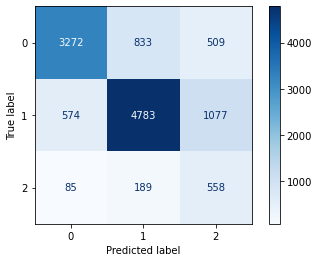

In [105]:
#plot confusion matrix
plot_confusion_matrix(svm_clf, X_test, y_test, cmap = plt.cm.Blues)

In [106]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.16792929292929293
0.4887371966012539


In [107]:
#summary table
summary_table.loc[8] = ['SVM',
                        round(svm_test_accuracy, 2), round(svm_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', round(bias(y_test, y_hat_test), 2), round(variance(y_hat_test), 2)]
summary_table.head(10)

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,76.01,0.72,0.65,0.67,0.66,0.27,0.33,0.57,-,0.02,0.39
1,Logistic Regression,65.31,0.74,0.60,0.67,0.58,0.42,0.55,0.74,0.82,0.24,0.55
2,KNN,75.66,0.72,0.64,0.68,0.66,0.28,0.34,0.59,-,0.05,0.40
3,Bagged Tree,78.21,0.76,0.67,0.69,0.68,0.24,0.30,0.54,-,0.01,0.37
4,Random Forest,79.37,0.77,0.69,0.70,0.69,0.23,0.28,0.53,-,0.02,0.37
5,Gradient Boost,79.86,0.78,0.69,0.70,0.70,0.22,0.27,0.52,-,0.03,0.37
6,ADABoost,63.01,0.72,0.56,0.61,0.55,0.44,0.59,0.77,-,0.21,0.53
7,XGBoost,77.03,0.78,0.67,0.71,0.68,0.26,0.32,0.57,-,0.09,0.41
8,SVM,72.50,0.76,0.64,0.71,0.64,0.32,0.42,0.65,-,0.17,0.49


In [108]:
#save
summary_table.to_csv('./Data/summary_table')

# Best Model: #5 Gradient Boost (79.86%) - with SMOTE

**continue with Part IIB**